# Word2Vec

### find similar word

In [1]:
path = "E:/Resource/sqlResult_1558435.csv"
import pandas as pd
dataframe = pd.read_csv(path, encoding="gb18030")

In [2]:
dataframe.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [3]:
import jieba

In [4]:
def cut(string): return ' '.join(jieba.cut(string))

In [5]:
cut("这是一个测试")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YOUNGY~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.606 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [6]:
content = dataframe["content"].fillna("").tolist()

In [7]:
import re

In [8]:
def token(string):
    return re.findall(r"[\w|\d]+",string) 

In [9]:
token("还是水水水水\n\n")

['还是水水水水']

In [10]:
content = [token(x) for x in content]

In [11]:
content = [" ".join(x) for x in content]

In [14]:
content[:10]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器 高通强调 不会因为只考虑性能而去屏蔽掉小核心 相反 他们正联手微软 找到一种适合桌面平台的 兼顾性能和功耗的完美方案 报道称 微软已经拿到了一些新的源码 以便Windows 10更好地理解big little架构 资料显示 骁龙835作为一款集成了CPU GPU 基带 蓝牙 Wi Fi的SoC 比传统的Wintel方案可以节省至少30 的PCB空间 按计划 今年Q4 华硕 惠普 联想将首发骁龙835 Win10电脑 预计均是二合一形态的产品 当然 高通骁龙只是个开始 未来也许还能见到三星Exynos 联发科 华为麒麟 小米澎湃等进入Windows 10桌面平台',
 '此前的一加3T搭载的是3400mAh电池 DashCharge快充规格为5V 4A 至于电池缩水 可能与刘作虎所说 一加手机5要做市面最轻薄大屏旗舰的设定有关 按照目前掌握的资料 一加手机5拥有5 5寸1080P三星AMOLED显示屏 6G 8GB RAM 64GB 128GB ROM 双1600万摄像头 备货量 惊喜 根据京东泄露的信息 一加5起售价是xx99元 应该是在2799 2899 2999中的某个',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车 新华社记者张立云摄',
 '原标题 44岁女子跑深圳约会网友被拒 暴雨中裸身奔走 深圳交警微博称 昨日清晨交警发现有一女子赤裸上身 行走在南坪快速上 期间还起了轻生年头 一辅警发现后赶紧为其披上黄衣 并一路劝说她 那么事发时 到底都发生了些什么呢 南都记者带您一起还原现场 南都记者在龙岗大队坂田中队见到了辅警刘青 发现女生的辅警 一位外表高大帅气 说话略带些腼腆的90后青年 刘青介绍 6月16日早上7时36分 他正在环城南路附近值勤 接到中队关于一位女子裸身进入机动车可能有危险的警情 随后骑着小铁骑开始沿路

In [12]:
tokens = [cut(x) for x in content]

In [18]:
"""import pickle
fw = open("pickle_news_tokens.txt",'wb')
pickle.dump(tokens,fw)
fw.close()
"""

In [13]:
tokens[:10]

['此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台',
 '此前 的 一加 3T 搭载 的 是 3400mAh 电池   DashCharge 快充 规格 为 5V   4A   至于 电池 缩水   可能 与 刘作 虎 所说   一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关   按照 目前 掌握 的 资料   一加 手机 5 拥有 5   5 寸 1080P 三星 AMOLED 显示屏   6G   8GB   RAM   64GB   128GB   ROM   双 1600 万 摄像头   备货 量

In [14]:
with open("tokens from news.txt",'w') as f:
    for n in tokens:
        f.write(n+'\n')

In [15]:
from gensim.models import  Word2Vec

C:\Users\Youngyang\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
from gensim.models.word2vec import LineSentence

In [17]:
news_word2vec = Word2Vec(LineSentence('tokens from news.txt'), size=35, workers=8)

C:\Users\Youngyang\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [13]:
help(Word2Vec.most_similar)

Help on function most_similar in module gensim.models.base_any2vec:

most_similar(self, positive=None, negative=None, topn=10, restrict_vocab=None, indexer=None)
    Deprecated, use self.wv.most_similar() instead.
    
    Refer to the documentation for :meth:`~gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar`.



In [18]:
news_word2vec.wv.most_similar('表示',topn=10)

[('指出', 0.8917859792709351),
 ('说', 0.8848108053207397),
 ('认为', 0.8820112943649292),
 ('透露', 0.821912407875061),
 ('坦言', 0.77437424659729),
 ('看来', 0.7726212739944458),
 ('强调', 0.7572674751281738),
 ('介绍', 0.7470400333404541),
 ('告诉', 0.7251546382904053),
 ('称', 0.7159398198127747)]

In [19]:
from collections import defaultdict

In [20]:
len({1,2,3})

3

In [21]:
def get_similar_words(initial_string, word2vec):
    word_list = list(initial_string)
    score = defaultdict(int)
    seen = set()
    iter_max = 50
    while word_list and len(seen)<iter_max :
        word = word_list.pop(0)
        seen.add(word)
        word_similar = word2vec.wv.most_similar(str(word),topn=10)
        for n in word_similar:
            
            score[n[0]] += 1
        word_similar = [n[0] for n in word_similar if n not in seen]
        word_list = word_list + word_similar
    #return score
    return sorted([(k,w)for k,w in score.items()],key=lambda x: x[1],reverse = True)

In [22]:
get_similar_words(['说','表示'],news_word2vec)

[('透露', 259),
 ('说', 257),
 ('坦言', 255),
 ('认为', 250),
 ('表示', 241),
 ('告诉', 201),
 ('看来', 186),
 ('指出', 178),
 ('称', 176),
 ('介绍', 126),
 ('明说', 99),
 ('强调', 82),
 ('建议', 64),
 ('普遍认为', 63),
 ('深有体会', 63),
 ('中称', 60),
 ('问', 52),
 ('知情', 42),
 ('提及', 39),
 ('还称', 35),
 ('直言', 28),
 ('写信给', 28),
 ('第三份', 27),
 ('童岚', 24),
 ('中说', 24),
 ('文说', 22),
 ('来说', 20),
 ('说法', 17),
 ('农艺师', 16),
 ('武说', 15),
 ('连生', 15),
 ('深有感触', 14),
 ('八面玲珑', 14),
 ('郭', 14),
 ('了解', 13),
 ('获悉', 13),
 ('重申', 13),
 ('特别感谢', 11),
 ('感谢', 11),
 ('一贯', 10),
 ('所说', 10),
 ('澄清', 10),
 ('表态', 10),
 ('谈谈', 9),
 ('冯武', 9),
 ('评价', 8),
 ('补充', 8),
 ('先生', 8),
 ('大夫', 8),
 ('称赞', 8),
 ('地说', 8),
 ('五角大楼', 8),
 ('特别强调', 7),
 ('高度重视', 7),
 ('全力支持', 7),
 ('所作', 7),
 ('呼吁', 7),
 ('要求', 7),
 ('意见建议', 7),
 ('采纳', 7),
 ('解释', 7),
 ('表明', 7),
 ('关注', 7),
 ('热议', 7),
 ('看好', 7),
 ('质疑', 7),
 ('猜测', 7),
 ('回答', 7),
 ('官网', 7),
 ('揭秘', 7),
 ('官方', 7),
 ('证词', 7),
 ('指责', 7),
 ('否认', 7),
 ('中间人', 7),
 ('提到', 6),
 ('反问', 6),
 ('

# tf-idf

In [38]:
def tf(string, doc):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    doc = doc.split()
    return sum(1 for n in doc if string == n)

In [2]:
tf('短期',tokens[11])

NameError: name 'tokens' is not defined

In [37]:
import math

In [36]:
def idf(word, content):
    def document_frequency(word):
        fre = sum(1 for n in content if word in n)
        return fre if fre != 0 else 1
    return math.log10(len(content)/document_frequency(word))

In [51]:
idf('银行',tokens)

1.4550169427748936

In [35]:
def get_keywords(doc,content):
    word = set(doc.split())
    tfidf = [
        (w, tf(w,doc)*idf(w,content)) for w in word
    ]
    tfidf = sorted(tfidf, key=lambda x : x[1], reverse=True)
    return tfidf

In [56]:
get_keywords(tokens[11],tokens)

[('市场', 21.353584391728972),
 ('股指', 18.198034968575843),
 ('周四', 17.26088617439966),
 ('均线', 15.505514875366993),
 ('板块', 15.184208429020511),
 ('创业板', 15.040542723113257),
 ('沪', 14.096891190311872),
 ('反弹', 11.40131732928378),
 ('巨丰', 11.244724023409647),
 ('普涨', 11.1657372072426),
 ('居前', 10.78835527475667),
 ('午后', 10.712813898115176),
 ('早盘', 10.614032989531069),
 ('大盘', 10.528860150725679),
 ('保险', 9.712428450401568),
 ('跳水', 9.392541082832015),
 ('具备', 9.384071811999714),
 ('局部性', 8.950480138145622),
 ('走势', 8.886316192504337),
 ('回落', 8.85749598983617),
 ('银行', 8.730101656649362),
 ('大涨', 8.113164172292002),
 ('涨幅', 7.982850978349081),
 ('阴线', 7.904722647584947),
 ('普跌', 7.676835942971274),
 ('上影线', 7.552540129473584),
 ('半年线', 7.552540129473584),
 ('题材', 7.529644664184074),
 ('个股', 7.317431171173604),
 ('伏击', 7.0747759516433115),
 ('探底', 7.010406584900509),
 ('行情', 6.978062869252294),
 ('兴业银行', 6.560526931713512),
 ('沪市', 6.52433048752792),
 ('复星', 6.472715960315349),
 ('白马股'

In [28]:
get_keywords(tokens[5],tokens)

[('股多', 4.9523613237924735),
 ('西水股份', 1.2380903309481184),
 ('李立峰', 0.9904722647584947),
 ('偏空', 0.4126967769827061),
 ('跷跷板', 0.3301574215861649),
 ('收红', 0.3001431105328772),
 ('次之', 0.29131537198779256),
 ('龙马', 0.29131537198779256),
 ('上海银行', 0.2606505959890775),
 ('非银行', 0.2606505959890775),
 ('国金', 0.24761806618962368),
 ('腾挪', 0.24761806618962368),
 ('金融股', 0.24040588950448902),
 ('红盘', 0.2251073328996579),
 ('国有银行', 0.2153200575561945),
 ('华夏银行', 0.20634838849135306),
 ('太保', 0.20634838849135306),
 ('乐乐', 0.19809445295169895),
 ('MSCI', 0.16693352776828563),
 ('成分股', 0.16507871079308245),
 ('题材股', 0.16507871079308245),
 ('华安', 0.15975359109007978),
 ('城商行', 0.14565768599389628),
 ('白马股', 0.143546705037463),
 ('稀释', 0.13384760334574253),
 ('安信', 0.13384760334574253),
 ('浦发银行', 0.1269836236869865),
 ('H股', 0.12380903309481184),
 ('消息面', 0.11791336485220175),
 ('金融公司', 0.11517119357656914),
 ('相对而言', 0.11255366644982895),
 ('比高', 0.10766002877809724),
 ('维系', 0.10766002877809724)

# WordCloud

In [42]:
import wordcloud

In [32]:
with open('tokens from news.txt') as f:
    tokens = [n for n in f]
    

In [39]:
words_fre = get_keywords(tokens[4],tokens)

In [40]:
words_fre = {
    k:v for k,v in words_fre
}

In [57]:
wc = wordcloud.WordCloud('E:Resource/SourceHanSerifSC-Regular.otf')

In [52]:
import os.path

In [56]:
os.path.exists('E:Resource/SourceHanSerifSC-Regular.otf')

True

In [37]:
wc = wordcloud.WordCloud()

In [58]:
wcimage = wc.generate_from_frequencies(words_fre)

In [59]:
words_fre

{'刘青': 67.12860103609216,
 '女子': 49.805410612821845,
 '南坪': 23.465811831805492,
 '交警': 15.805787932978273,
 '坂田': 13.953993984385477,
 '黄衣': 13.050903997393533,
 '巡防': 11.328810194210376,
 '了': 11.012005636840637,
 '轻生': 10.382998889874603,
 '护栏': 9.32178985133465,
 '坂雪岗': 9.302662656256985,
 '裸身': 9.302662656256985,
 '她': 9.285022817533253,
 '约会': 9.267115391016052,
 '深圳': 9.139285494790956,
 '发现': 8.685059498920872,
 '蜀黍': 8.214526567556433,
 '网友': 8.126865289542744,
 '突然': 8.047379355439626,
 '十多分钟': 7.746360155489698,
 '内裤': 7.746360155489698,
 '着': 7.69376356788892,
 '铁骑': 7.496482682273098,
 '大概': 7.478906508099729,
 '缓慢': 7.465405004419699,
 '龙岗': 7.181266975549762,
 '快速路': 7.108842630240872,
 '大道': 6.863158044709045,
 '环城': 6.816586558884396,
 '辅警': 6.7921176460503725,
 '往前走': 6.722593433531949,
 '走': 6.658635364608071,
 '视频': 6.65823837544899,
 '市民': 6.50820380832565,
 '精神病': 6.4895822953890745,
 '主干道': 6.456170908383369,
 '快速': 6.427950372933541,
 '南路': 6.319939268588439,
 '陈

In [60]:
import matplotlib.pyplot as plt

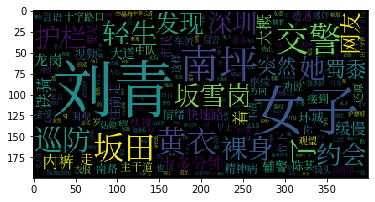

In [61]:
plt.imshow(wcimage)

# TFIDF Vectorized

#### utilize tf-idf to get similarity of two articles.
#### May proceed to ML for classification

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
vectorized = TfidfVectorizer(max_features=10000)

In [8]:
f = open("tokens from news.txt")
articles = f.read()
articles_split = articles.split('\n')
f.close()

In [29]:
f.close()

In [9]:
sample_number = 5000
sub_sample = articles_split[:sample_number]

In [10]:
import numpy as np

In [11]:
len(articles)

59317512

In [13]:
X = vectorized.fit_transform(sub_sample)

In [14]:
X.shape

(5000, 10000)

In [15]:
np.where(X[0].toarray()[0])

(array([  36,   58,  442, 1086, 1103, 1700, 1905, 1978, 2008, 2734, 2802,
        2908, 4140, 4254, 4270, 4536, 4652, 4673, 4949, 5022, 5788, 5876,
        5902, 5954, 6040, 6077, 6325, 6934, 7356, 7379, 7617, 7676, 9061,
        9130, 9627], dtype=int64),)

In [16]:
from scipy.spatial.distance import cosine

In [17]:
def vector_angel(v1,v2): return cosine(v1,v2)

In [18]:
vector_angel([1,1],[2,2])

0.0

In [19]:
vector_angel(X[0].toarray()[0],X[1].toarray()[0])

0.9656256166073227

In [20]:
def article_tfidf_sim(i1,i2,vectorizer):
    return vector_angel(vectorizer[i1].toarray()[0], vectorizer[i2].toarray()[0])

In [21]:
article_tfidf_sim(0,0,X)

0.0

In [21]:
X.shape

(5000, 10000)

In [22]:
def get_similar_ariticles(index,vectorizer,topn = 10):
    return sorted(range(vectorizer.shape[0]), key=lambda x: article_tfidf_sim(index,x,vectorizer))[:topn]

In [23]:
get_similar_ariticles(0,X)

C:\Users\Youngyang\Anaconda3\lib\site-packages\scipy\spatial\distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[0, 471, 816, 2860, 244, 91, 6, 58, 48, 95]

# Search Engine

In [18]:
def naive_search(string, contents):
    return [i for i,n in enumerate(contents) if all(w in n for w in string) ]

In [19]:
naive_search(('小米','华为'),tokens)

[1,
 91,
 276,
 465,
 1409,
 2540,
 3227,
 3430,
 4730,
 4836,
 5185,
 5612,
 5811,
 5978,
 8067,
 10629,
 37420,
 37503,
 41554,
 55711,
 55792,
 56545,
 56683,
 63096,
 63113]

In [21]:
naive_search("小米 华为".split(),tokens)

[1,
 91,
 276,
 465,
 1409,
 2540,
 3227,
 3430,
 4730,
 4836,
 5185,
 5612,
 5811,
 5978,
 8067,
 10629,
 37420,
 37503,
 41554,
 55711,
 55792,
 56545,
 56683,
 63096,
 63113]

In [128]:
word2id = vectorized.vocabulary_

In [130]:
word2id['小米']

4140

In [26]:
np.where(vectorized.transform(["小米 华为"]).toarray()[0])

(array([2585, 4140]),)

In [24]:
from functools import reduce

In [25]:
from operator import and_

In [26]:
def search_engine(query, vectorizer):
    tokens = query.split()
    query_vec = vectorizer.transform([query]).toarray()[0]
    tokens_id = np.where(vectorizer.transform([query]).toarray()[0])[0]
    #csr_matrix的列索引同样会导向行索引，即matx[:][n] == matx[n] ==matx[n][0],需要转置提取列信息
    X_transpose = X.transpose()
    candidate_id = [set(np.where(X_transpose[n].toarray()[0])[0]) for n in tokens_id]
    search_result = reduce(and_, candidate_id)
    search_result = sorted(search_result, key = lambda x: vector_angel(query_vec, x))
    return search_result

In [27]:
search_engine('小米 华为', vectorized)

[1, 1409, 4836, 3430, 91, 2540, 465, 276, 4730, 3227]

In [28]:
articles_split[1409]

'注   数据 来源   安兔 兔 评测   数据 机型   安卓 手机   市场 区域   国内 市场   屏幕 尺寸   智能手机 屏幕 尺寸 是 大 是 小   直接 影响 着 用户 的 视觉 体验   就 5 月安兔 兔 用户 手机 屏幕 尺寸 分布 数据 来说   5   5 英寸 屏在 安兔 兔 手机用户 中 占 比 最高   达到 了 27   51   其次 则 是 5   1 英寸 屏 和 5   7 英寸 屏   特别 要 指出 的 是   5   5 英寸 屏 和 5   1 英寸 屏 用户 总占 比 超过 了 50   当年 乔布斯 说 3   5 英寸 屏是 最佳 的 握持 尺寸   现如今   在 手机 厂商 的 推动 下   消费者 早已 适应 了 更 大 的 手机 屏幕   5 英寸 左右 的 屏幕 在 握持 感 和 视野 方面 达成 了 平衡   成为 了 大多数 用户 的 选择   屏幕 分辨率   就 5 月安兔 兔 用户 手机 屏幕 分辨率 分布 数据 而言   1080   1920 像素 依然 在 安兔 兔 手机用户 中 占 比 最高   达到 了 72   41   远远 超过 了 半数   1440   2560 像素   720   1280 像素 用户 占 比 则 分别 位居 其后   其实   从 目前 的 手机 产品 不难看出   无论是 高端 手机   比如 华为 P10   小米 6   还是 中低端 产品   魅蓝   红米 系列   大都 是 1080p   1080   1920 像素   分辨率   这 就 注定 了 它 在 安兔 兔 用户 手机 屏幕 分辨率 占 比 中 的 霸主 地位   预计 接下来 很长 一段时间 都 不会 改变   RAM 容量   智能手机 的 发展   也 伴随 着 手机 硬件 配置 参数 的 不断 升级   从 5 月安兔 兔 用户 手机 RAM 容量 分布 数据 来看   2GB   RAM 用户 占 比 现已 不足 10   相信 不久 之后   它 将 会 与 当年 的 512MB   RAM 一样   退出 智能手机 的 舞台   与此同时   4GB   RAM 和 6GB   RAM 的 用户 占 比 则 均 超过 了 30   与 3GB   RAM 形